In [66]:
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [68]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)   
y_pred=model.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


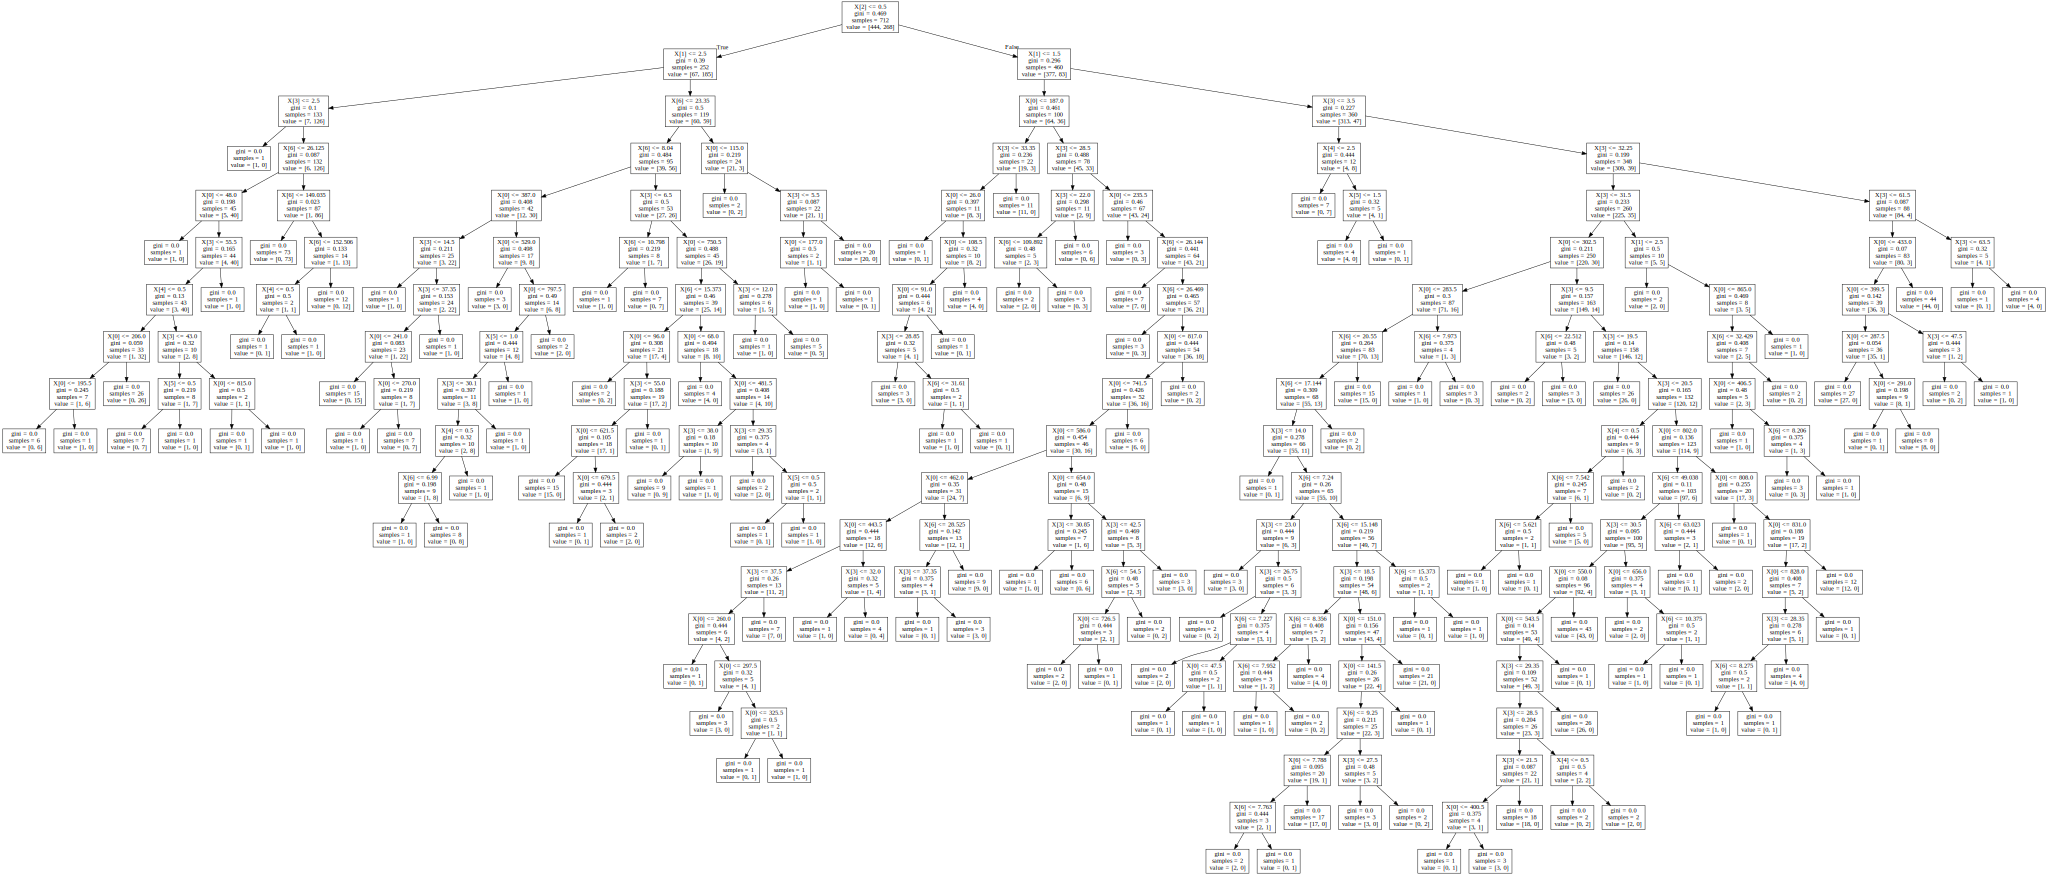

In [69]:
import graphviz 
dot_data= tree.export_graphviz(model,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [70]:
dtree=tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


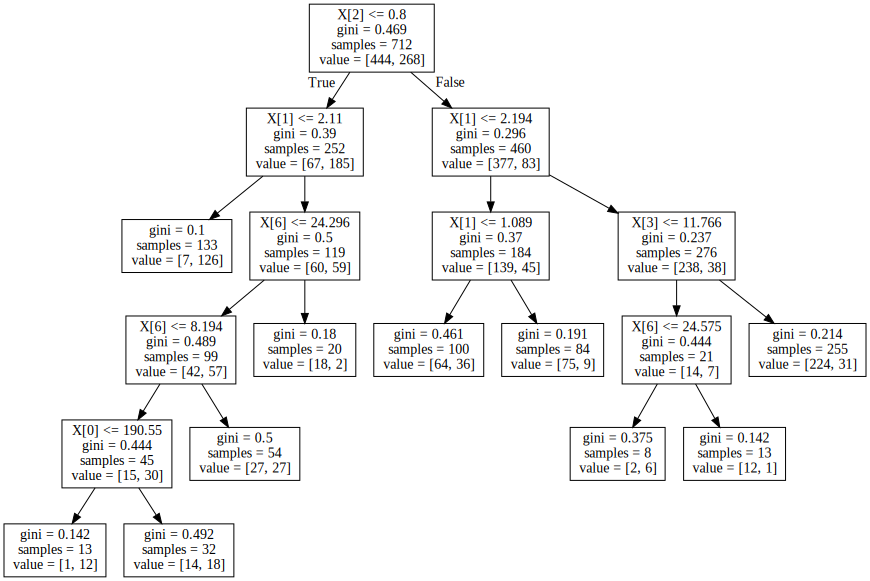

In [71]:
dot_data= tree.export_graphviz(dtree,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [102]:
dtree=tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=20,min_samples_leaf=5,max_depth=5,min_impurity_decrease=0.001,ccp_alpha=0.005)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8212290502793296


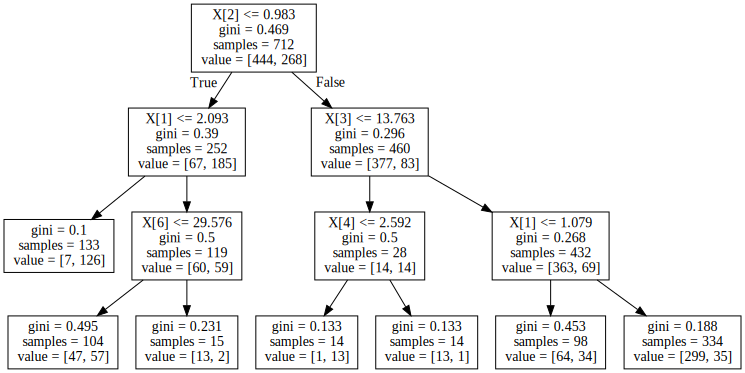

In [103]:
dot_data= tree.export_graphviz(dtree,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

When changing some parameters, the accuracy increased.

In [113]:
clf=RandomForestClassifier(n_estimators=5)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8268156424581006


In [114]:
clf=RandomForestClassifier(n_estimators=30)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8547486033519553


The random forest has a better accuracy than the descision tree and when adding the number of estimations, we get even better accuracy